# **ÍNICIO**

**Importação das bibliotecas**



In [1]:
import pandas as pd
import re
import spacy

**Leitura das páginas das anotações**
- df pertence a Miguel António
- dfP pertence a Pedro Azevedo

In [2]:
df = pd.read_excel("C:\\Users\\Miguel António\\Desktop\\3\\PLN\\PRÁTICAS\\META1\\PLN2024_Grupo3.xlsx",sheet_name=1)
dfP = pd.read_excel("C:\\Users\\Miguel António\\Desktop\\3\\PLN\\PRÁTICAS\\META1\\PLN2024_Grupo3.xlsx",sheet_name=2)

df

,Dialog_ID,Msg,Annotation,101
0,73.0,Bom dia🌞!\n\nSabia que a pensão de alimentos p...,0.0,NaN
1,73.0,🎧#Podcast Hoje na Deco Proteste vamos falar so...,0.0,NaN
2,NaN,NaN,NaN,NaN
3,74.0,“O Estado não está a ganhar dinheiro com os co...,-1.0,NaN
4,74.0,@bracadabracabra @ECO_PT (1/2) Olá. A informaç...,0.0,NaN
...,...,...,...,...
141,217.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN
142,217.0,@NetflixPT agradeço por só ter visto arcane daí,-1.0,NaN
143,NaN,NaN,NaN,NaN
144,218.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN


**Pré-processamento**
- como haviam linhas que não continham nada (valores NaN) decidimos eliminá-las

In [3]:
df_clean = df.dropna(how='all')
dfP_clean = dfP.dropna(how='all')

In [4]:
df_clean
dfP_clean

,Dialog_ID,Msg,Annotation,101
0,73.0,Bom dia🌞!\n\nSabia que a pensão de alimentos p...,1.0,NaN
1,73.0,🎧#Podcast Hoje na Deco Proteste vamos falar so...,0.0,NaN
3,74.0,“O Estado não está a ganhar dinheiro com os co...,-1.0,NaN
4,74.0,@bracadabracabra @ECO_PT (1/2) Olá. A informaç...,0.0,NaN
5,74.0,@decoproteste @ECO_PT Obrigado pela V. Informa...,0.0,NaN
...,...,...,...,...
139,216.0,@NetflixPT Scorpions\n que vcs tirarammmmmmmm,-1.0,NaN
141,217.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN
142,217.0,@NetflixPT agradeço por só ter visto arcane daí,1.0,NaN
144,218.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN


- Para se poder fazer a tokenização, PoS Tagging e Lematização, tivemos que separar cada mensagem da coluna "Msg" do excel e fazer uma lista

In [5]:
msg = []

for i in range(len(df_clean)):
    msg.append(df_clean['Msg'].iloc[i])  

print(msg)


['Bom dia🌞!\n\nSabia que a pensão de alimentos paga aos filhos pode  prolongar-se até aos 25 anos?\n\n#decoproteste #Portugal', '🎧#Podcast Hoje na Deco Proteste vamos falar sobre pensão de alimentos. Não perca!\n👇https://t.co/JhiCF3GJz0\n\nDisponível em:\n🎙️@spotifypodcasts\n🎙️@ApplePodcasts\n🎙️@Google Podcasts', '“O Estado não está a ganhar dinheiro com os combustíveis”, diz Mendonça Mendes https://t.co/INXKQGtw64', '@bracadabracabra @ECO_PT (1/2) Olá. A informação dada relativamente ao Autovoucher teve por base as leis e informações oficiais divulgadas pelo Governo. O objetivo do artigo em causa não é analisar os aumentos históricos que os combustíveis têm sofrido nem avaliar as decisões tomadas pelo Governo.', '@decoproteste @ECO_PT Obrigado pela V. Informação. Como já aqui referi, a realidade excede qq ficção ou decreto-lei. Parece que na realidade a “devolução” não tem nada a ver com consumos de combustíveis. https://t.co/tX4p4iFvnr', '“O Estado não está a ganhar dinheiro com os c

- Como continham emojis, e links tivemos que eliminar isso

In [6]:
import re

msg1 = []

emojis = re.compile(
    "[" 
    u"\U0001F600-\U0001F64F"  
    u"\U0001F300-\U0001F5FF"  
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F700-\U0001F77F"  
    u"\U0001F780-\U0001F7FF"  
    u"\U0001F800-\U0001F8FF"  
    u"\U00002600-\U000026FF"  
    u"\U00002700-\U000027BF"  
    u"\U00002B50-\U00002B55"  
    "]+", flags=re.UNICODE)

links = re.compile(r'http\S+|www.\S+')

for i in range(len(df_clean)):
    mensagem = df_clean['Msg'].iloc[i]   
    mensagem_nova = links.sub(r'', mensagem)  
    mensagem_nova = emojis.sub(r'', mensagem_nova)
    
    msg1.append(mensagem_nova)

print(msg1)


['Bom dia!\n\nSabia que a pensão de alimentos paga aos filhos pode  prolongar-se até aos 25 anos?\n\n#decoproteste #Portugal', '#Podcast Hoje na Deco Proteste vamos falar sobre pensão de alimentos. Não perca!\n\n\nDisponível em:\n️@spotifypodcasts\n️@ApplePodcasts\n️@Google Podcasts', '“O Estado não está a ganhar dinheiro com os combustíveis”, diz Mendonça Mendes ', '@bracadabracabra @ECO_PT (1/2) Olá. A informação dada relativamente ao Autovoucher teve por base as leis e informações oficiais divulgadas pelo Governo. O objetivo do artigo em causa não é analisar os aumentos históricos que os combustíveis têm sofrido nem avaliar as decisões tomadas pelo Governo.', '@decoproteste @ECO_PT Obrigado pela V. Informação. Como já aqui referi, a realidade excede qq ficção ou decreto-lei. Parece que na realidade a “devolução” não tem nada a ver com consumos de combustíveis. ', '“O Estado não está a ganhar dinheiro com os combustíveis”, diz Mendonça Mendes ', '@bracadabracabra @ECO_PT (2/2) Mas si

# **Análise de Anotações**

**PoS Tagging**

In [7]:
nlp = spacy.load("pt_core_news_sm")

msg_pos_tag = []

for mensagem in msg1:
    doc = nlp(mensagem)  
    mensagem_tag = [(token.text, token.pos_) for token in doc] 
    msg_pos_tag.append(mensagem_tag)

for i, tag in enumerate(msg_pos_tag):
    print(f"Mensagem {i+1}: {tag}")


Mensagem 1: [('Bom', 'ADJ'), ('dia', 'NOUN'), ('!', 'PUNCT'), ('\n\n', 'SPACE'), ('Sabia', 'VERB'), ('que', 'SCONJ'), ('a', 'DET'), ('pensão', 'NOUN'), ('de', 'ADP'), ('alimentos', 'NOUN'), ('paga', 'VERB'), ('aos', 'ADP'), ('filhos', 'NOUN'), ('pode', 'VERB'), (' ', 'SPACE'), ('prolongar-se', 'VERB'), ('até', 'ADP'), ('aos', 'ADP'), ('25', 'NUM'), ('anos', 'NOUN'), ('?', 'PUNCT'), ('\n\n', 'SPACE'), ('#', 'NOUN'), ('decoproteste', 'VERB'), ('#', 'NOUN'), ('Portugal', 'PROPN')]
Mensagem 2: [('#', 'NOUN'), ('Podcast', 'PROPN'), ('Hoje', 'ADV'), ('na', 'ADP'), ('Deco', 'PROPN'), ('Proteste', 'PROPN'), ('vamos', 'AUX'), ('falar', 'VERB'), ('sobre', 'ADP'), ('pensão', 'NOUN'), ('de', 'ADP'), ('alimentos', 'NOUN'), ('.', 'PUNCT'), ('Não', 'ADV'), ('perca', 'VERB'), ('!', 'PUNCT'), ('\n\n\n', 'SPACE'), ('Disponível', 'ADJ'), ('em', 'ADP'), (':', 'PUNCT'), ('\n', 'SPACE'), ('️@spotifypodcasts', 'VERB'), ('\n', 'SPACE'), ('️@ApplePodcasts', 'VERB'), ('\n', 'SPACE'), ('️@Google', 'NOUN'), ('Pod

**Lematização**

In [8]:
lemas = []

for mensagem in msg1:
    doc = nlp(mensagem)  
    lema = [token.lemma_ for token in doc]  
    lemas.append(lema)

for i, lema in enumerate(lemas):
    print(f"Lemas da mensagem {i+1}: {lema}")

Lemas da mensagem 1: ['bom', 'dia', '!', '\n\n', 'Sabia', 'que', 'o', 'pensão', 'de', 'alimento', 'pagar', 'a o', 'filho', 'poder', ' ', 'prolongar-se', 'até', 'a o', '25', 'ano', '?', '\n\n', '#', 'decoprotestir', '#', 'Portugal']
Lemas da mensagem 2: ['#', 'Podcast', 'Hoje', 'em o', 'Deco', 'Proteste', 'ir', 'falar', 'sobre', 'pensão', 'de', 'alimento', '.', 'não', 'percar', '!', '\n\n\n', 'disponível', 'em', ':', '\n', '️@spotifypodcasts', '\n', '️@ApplePodcasts', '\n', '️@Google', 'Podcasts']
Lemas da mensagem 3: ['“', 'o', 'Estado', 'não', 'estar', 'a', 'ganhar', 'dinheiro', 'com', 'o', 'combustível', '”', ',', 'dizer', 'Mendonça', 'Mendes']
Lemas da mensagem 4: ['@bracadabracabra', '@ECO_PT', '(', '1/2', ')', 'Olá', '.', 'o', 'informação', 'dar', 'relativamente', 'a o', 'Autovoucher', 'ter', 'por', 'base', 'o', 'lei', 'e', 'informação', 'oficial', 'divulgar', 'por o', 'Governo', '.', 'o', 'objetivo', 'de o', 'artigo', 'em', 'causa', 'não', 'ser', 'analisar', 'o', 'aumento', 'hist

**Concordância inter-anotadores**
- Concordância percentual
- Cohen's kappa
- Fleis's kappa
- Krippendorff alpha

In [9]:
df_clean

,Dialog_ID,Msg,Annotation,101
0,73.0,Bom dia🌞!\n\nSabia que a pensão de alimentos p...,0.0,NaN
1,73.0,🎧#Podcast Hoje na Deco Proteste vamos falar so...,0.0,NaN
3,74.0,“O Estado não está a ganhar dinheiro com os co...,-1.0,NaN
4,74.0,@bracadabracabra @ECO_PT (1/2) Olá. A informaç...,0.0,NaN
5,74.0,@decoproteste @ECO_PT Obrigado pela V. Informa...,1.0,NaN
...,...,...,...,...
139,216.0,@NetflixPT Scorpions\n que vcs tirarammmmmmmm,-1.0,NaN
141,217.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN
142,217.0,@NetflixPT agradeço por só ter visto arcane daí,-1.0,NaN
144,218.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN


In [10]:
dfP_clean

,Dialog_ID,Msg,Annotation,101
0,73.0,Bom dia🌞!\n\nSabia que a pensão de alimentos p...,1.0,NaN
1,73.0,🎧#Podcast Hoje na Deco Proteste vamos falar so...,0.0,NaN
3,74.0,“O Estado não está a ganhar dinheiro com os co...,-1.0,NaN
4,74.0,@bracadabracabra @ECO_PT (1/2) Olá. A informaç...,0.0,NaN
5,74.0,@decoproteste @ECO_PT Obrigado pela V. Informa...,0.0,NaN
...,...,...,...,...
139,216.0,@NetflixPT Scorpions\n que vcs tirarammmmmmmm,-1.0,NaN
141,217.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN
142,217.0,@NetflixPT agradeço por só ter visto arcane daí,1.0,NaN
144,218.0,Só podes escolher um. 👀 https://t.co/hLnJFAQJ3F,0.0,NaN


In [11]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import statsmodels.stats.inter_rater as irr
import krippendorff

anotacao_1 = df_clean['Annotation']
anotacao_2 = dfP_clean['Annotation']

    
# Concordância percentual
concordancia_percentual = (anotacao_1 == anotacao_2).mean() * 100
print(f'Concordância Percentual: {concordancia_percentual:.2f}%')
        
# Cohen's kappa
kappa = cohen_kappa_score(anotacao_1, anotacao_2)
print(f"Cohen's Kappa: {kappa:.2f}")


categorias = [-2, -1, 0, 1]  
df_anotacoes = pd.DataFrame({'Anotador_1': anotacao_1, 'Anotador_2': anotacao_2})
# Fleiss' kappa
conta_por_dialogo = []
for _, linha in df_anotacoes.iterrows():
    conta = []  
    for cat in categorias:
        conta.append(list(linha).count(cat))
    conta_por_dialogo.append(conta)

fleiss_kappa_val = irr.fleiss_kappa(conta_por_dialogo, method='fleiss')
print(f"Fleiss' Kappa: {fleiss_kappa_val:.2f}")

# Krippendorff alpha
matriz_anotacoes = df_anotacoes.T.to_numpy()
alpha = krippendorff.alpha(reliability_data=matriz_anotacoes, level_of_measurement='ordinal')
print(f"Krippendorff's Alpha: {alpha:.2f}")



Concordância Percentual: 67.33%
Cohen's Kappa: 0.45
Fleiss' Kappa: 0.44
Krippendorff's Alpha: 0.66


**Distribuição de Valores**
- comparação das anotações que fizemos para cada mensagem (número de vezes que cada anotador avaliou uma mensagem com -2, -1, 0 ou 1)

Distribuição de valores - Anotador 1:
Annotation
 0.0    66
-1.0    20
 1.0    10
-2.0     5
Name: count, dtype: int64

Distribuição de valores - Anotador 2:
Annotation
 0.0    53
-1.0    22
 1.0    16
-2.0    10
Name: count, dtype: int64


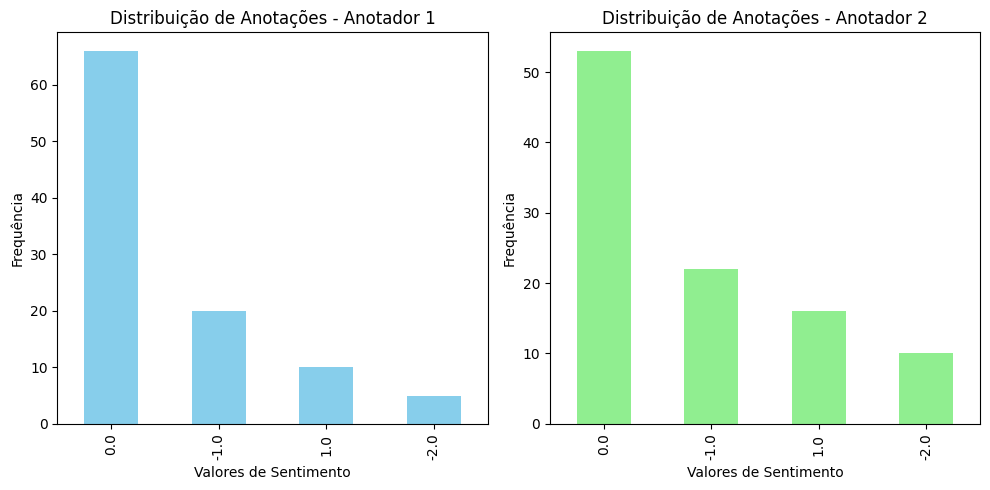

In [12]:
import matplotlib.pyplot as plt



dist_1 = anotacao_1.value_counts()
dist_2 = anotacao_2.value_counts()

print("Distribuição de valores - Anotador 1:")
print(dist_1)
print("\nDistribuição de valores - Anotador 2:")
print(dist_2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
dist_1.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Anotações - Anotador 1')
plt.xlabel('Valores de Sentimento')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
dist_2.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de Anotações - Anotador 2')
plt.xlabel('Valores de Sentimento')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


**Análise Manual**

In [13]:
discordancias = df_anotacoes[anotacao_1 != anotacao_2]
print("Casos de Discordância:")
print(discordancias)
print(len(discordancias))


Casos de Discordância:
     Anotador_1  Anotador_2
0           0.0         1.0
5           1.0         0.0
7           0.0        -1.0
8           1.0         0.0
21          0.0        -1.0
24          0.0        -1.0
26         -1.0        -2.0
29         -1.0        -2.0
30          0.0        -1.0
32         -1.0        -2.0
36          0.0        -1.0
47         -1.0        -2.0
54          1.0         0.0
57          1.0         0.0
59          0.0        -1.0
60          0.0        -1.0
67          1.0         0.0
72          0.0        -1.0
73         -1.0        -2.0
75          0.0         1.0
80          0.0         1.0
83          0.0         1.0
85          0.0        -1.0
98          0.0         1.0
110         0.0         1.0
111         0.0         1.0
112         1.0         0.0
121         0.0         1.0
124         0.0         1.0
127         0.0         1.0
130         0.0         1.0
133        -1.0         0.0
142        -1.0         1.0
33


# **Análise de Corpora**

**Stopwords**

Eliminar as stopwords das mensagens

In [14]:
import spacy

nlp = spacy.load("pt_core_news_sm")


msg_sem_stopwords = []
stopwords = nlp.Defaults.stop_words

for mensagem in msg1:
    doc = nlp(mensagem.lower())
    
    tokens_filtrados = []

    for token in doc:
        if token.is_alpha and token.text not in stopwords:
            tokens_filtrados.append(token.text)

    
    mensagem_sem_stopwords = ' '.join(tokens_filtrados)
    
    msg_sem_stopwords.append(mensagem_sem_stopwords)

print(msg_sem_stopwords)


['dia sabia pensão alimentos paga filhos anos decoproteste portugal', 'podcast hoje deco proteste vamos falar pensão alimentos perca disponível podcasts', 'ganhar dinheiro combustíveis mendonça mendes', 'olá informação dada relativamente autovoucher base leis informações oficiais divulgadas governo objetivo artigo causa analisar aumentos históricos combustíveis sofrido avaliar decisões tomadas governo', 'informação referi realidade excede qq ficção realidade devolução consumos combustíveis', 'ganhar dinheiro combustíveis mendonça mendes', 'clarificar formas obter descontos programa dele usufruir contacto', 'reguladores portuguese coniventes empresas praticam esquemas criminosos visam aumentar lucros penalizar insignificantes clientes anedota associação encher bolso', 'olá podermos pronunciar factualmente precisamos detalhes assunto pedimos contacto contacto', 'costuma compostagem decoproteste portugal', 'podcast hoje deco proteste vamos dicas compostores caseiros perca disponível podca

**Topwords**

Eliminar as palavras que aparecem com maior frequência nas frases

In [15]:
from collections import Counter

msg_sem_topwords = []

for mensagem in msg1:
    doc = nlp(mensagem.lower())
    tokens_filtrados = [token.text for token in doc if token.is_alpha and token.text not in stopwords]
    mensagem_sem_stopwords = ' '.join(tokens_filtrados)
    msg_sem_stopwords.append(mensagem_sem_stopwords)

tokens = []

for sublist in msg_sem_stopwords:
    for token in sublist.split():
        tokens.append(token)

topwords_conta = Counter(tokens)

topwords = topwords_conta.most_common(5)

print("Topwords:", topwords)


Topwords: [('meo', 46), ('podes', 38), ('escolher', 38), ('dia', 18), ('contacto', 16)]


**Estatísticas**


Contagem das palavras em todas as mensagens

In [16]:
texto_completo = ' '.join(msg1)
tokens = texto_completo.split()

numero_palavras = len(tokens)

print(f"Total de palavras: {numero_palavras}")


Total de palavras: 1750


Número médio de palavras por tweet

In [17]:
media = numero_palavras/len(msg1)
print(media)

17.326732673267326


Contagem dos diálogos

In [18]:
dialogos = df_clean['Dialog_ID'].tolist()
dialogos_dif = []

for i in range(len(dialogos)):
        if dialogos[i] not in dialogos_dif:
            dialogos_dif.append(dialogos[i])

print(len(dialogos_dif))


46
